<a href="https://colab.research.google.com/github/deny-joefakri/Multiple-Linear-regression/blob/main/Multiple_Linear_Regression_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
descr = california_housing['DESCR']
feature_names = california_housing['feature_names']
data = california_housing['data']
target = california_housing['target']

In [ ]:
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
                  4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'HouseValue'}, inplace=True)
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

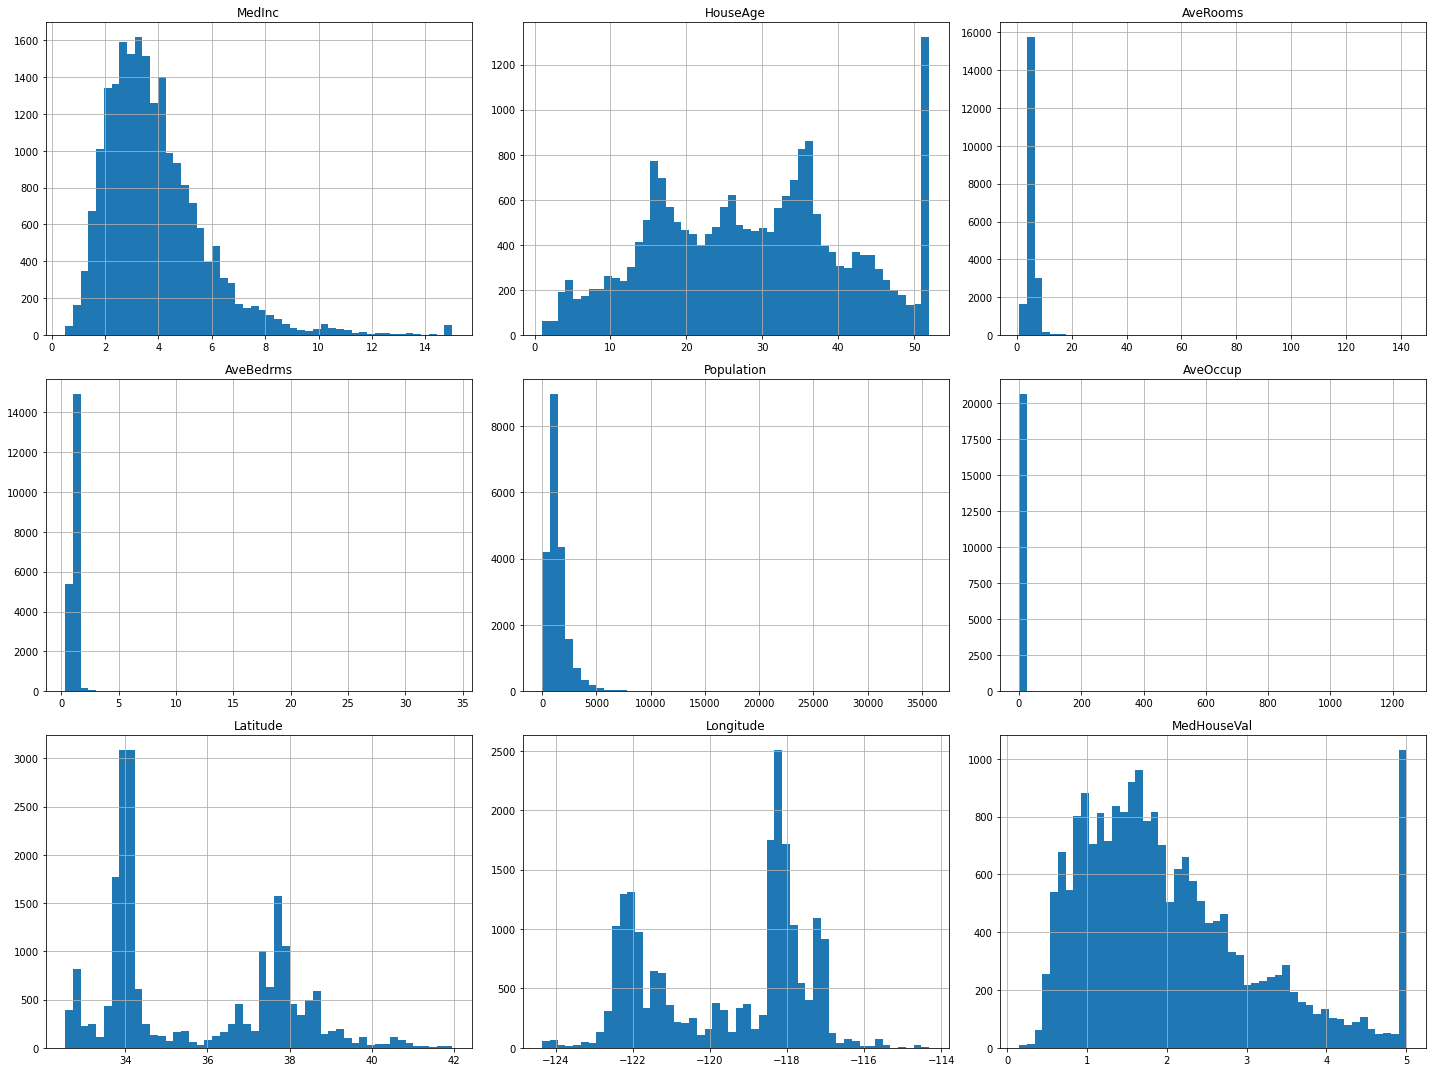

In [ ]:
print(df.describe())

df.hist(figsize=(20,15), bins=50)
plt.tight_layout()
plt.show()

X = california_housing.data
y = california_housing.target


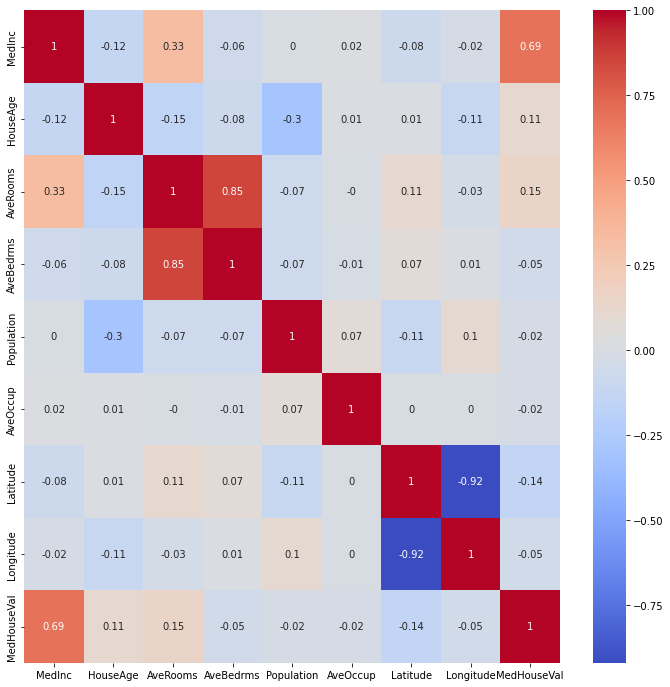

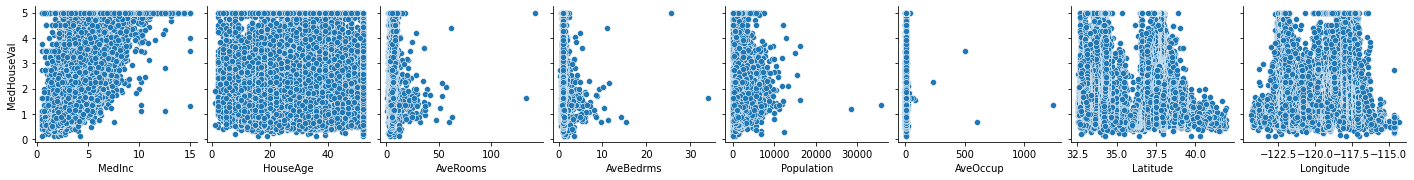

In [ ]:
corr_matrix = df.corr().round(2)

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Create a scatter plot matrix
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], y_vars=['MedHouseVal'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Build a multiple linear regression model with all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

# Build a multiple linear regression model with selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate the performance of the models
mse_all = mean_squared_error(y_test, y_pred_all)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_all = r2_score(y_test, y_pred_all)
r2_selected = r2_score(y_test, y_pred_selected)

# Print the results
print('MSE (all features):', mse_all)
print('MSE (selected features):', mse_selected)
print('R2 (all features):', r2_all)
print('R2 (selected features):', r2_selected)

MSE (all features): 0.5558915986952444
MSE (selected features): 0.6382565441555921
R2 (all features): 0.5757877060324508
R2 (selected features): 0.5129333248216971
